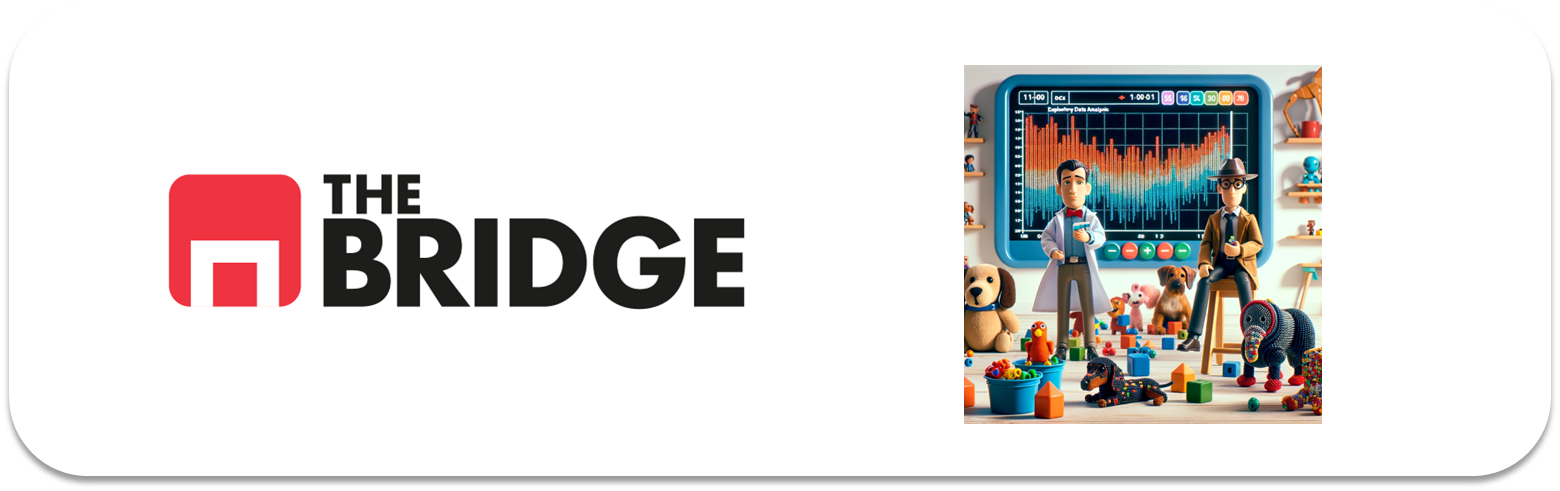

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu 

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [28]:
df_titanic = pd.read_csv('./data/titanic.csv')
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [29]:
df_titanic.drop(columns=['deck', 'survived', 'pclass', 'embarked'], inplace=True)


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [30]:
df_titanic['family_members'] = df_titanic['sibsp'] + df_titanic['parch']


In [31]:
df_titanic.drop(columns=['sibsp', 'parch'], inplace=True)
df_titanic.head(10)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
5,male,NaN,8.4583,Third,man,True,Queenstown,no,True,0
6,male,54.0,51.8625,First,man,True,Southampton,no,True,0
7,male,2.0,21.0750,Third,child,False,Southampton,no,False,4
8,female,27.0,11.1333,Third,woman,False,Southampton,yes,False,2
9,female,14.0,30.0708,Second,child,False,Cherbourg,yes,False,1


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [32]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


In [45]:
moda_embark_town = df_titanic.embark_town.mode()
moda_embark_town


0    Southampton
Name: embark_town, dtype: object

In [75]:
df_titanic.loc[df_titanic['embark_town'].isnull(), 'embark_town'] = 'Southampton'
#Intenté asignarle la variable moda_embark_town y directamente df_titanic.embark_town.mode(), 
#Pero no me funcionaba, supongo porque era un tipo Serie

In [73]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               891 non-null    object 
 1   age               891 non-null    float64
 2   fare              891 non-null    float64
 3   class             891 non-null    object 
 4   who               891 non-null    object 
 5   adult_male        891 non-null    bool   
 6   embark_town       891 non-null    object 
 7   alive             891 non-null    object 
 8   alone             891 non-null    bool   
 9   family_members    891 non-null    int64  
 10  moda_embark_town  0 non-null      object 
dtypes: bool(2), float64(2), int64(1), object(6)
memory usage: 64.5+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [62]:
es_woman = df_titanic.who =='woman'
es_child = df_titanic.who =='child'
es_man = df_titanic.who =='man'

media_woman = df_titanic.loc[es_woman, 'age'].mean()
media_child = df_titanic.loc[es_child, 'age'].mean()
media_man = df_titanic.loc[es_man, 'age'].mean()

es_age_nulo = df_titanic.age.isna()

df_titanic.loc[es_woman & es_age_nulo, 'age'] = media_woman
df_titanic.loc[es_child & es_age_nulo, 'age'] = media_child
df_titanic.loc[es_man & es_age_nulo, 'age'] = media_man

In [74]:
df_titanic.info() #verifico que esté todo ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               891 non-null    object 
 1   age               891 non-null    float64
 2   fare              891 non-null    float64
 3   class             891 non-null    object 
 4   who               891 non-null    object 
 5   adult_male        891 non-null    bool   
 6   embark_town       891 non-null    object 
 7   alive             891 non-null    object 
 8   alone             891 non-null    bool   
 9   family_members    891 non-null    int64  
 10  moda_embark_town  0 non-null      object 
dtypes: bool(2), float64(2), int64(1), object(6)
memory usage: 64.5+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

## 1

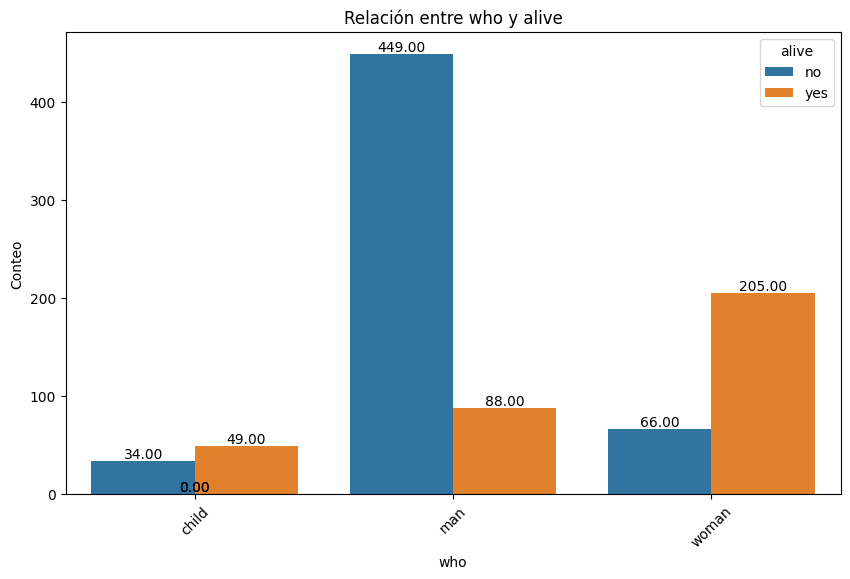

In [81]:
plot_categorical_relationship_fin(df_titanic,"who","alive", relative_freq= False, show_values= True)
#En terminos absolutos sobrevivieron más mujeres

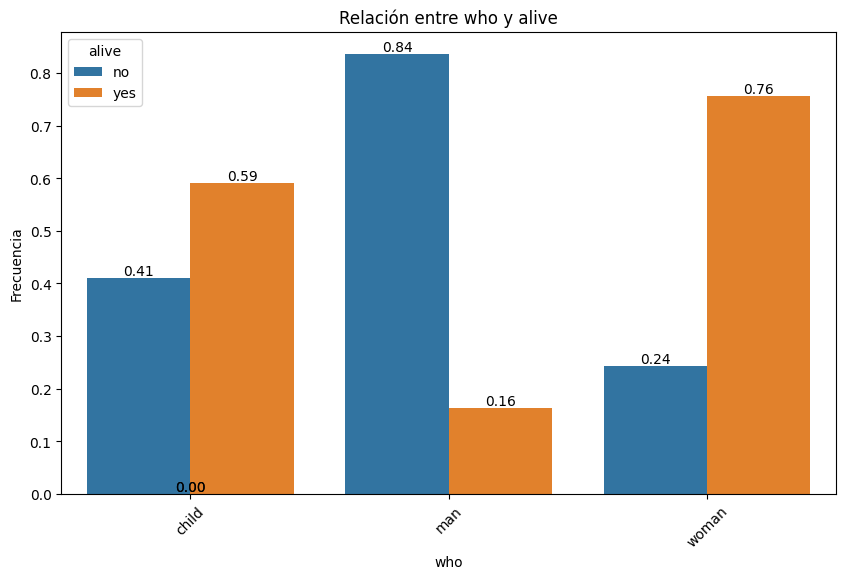

In [82]:
plot_categorical_relationship_fin(df_titanic,"who","alive", relative_freq= True, show_values= True)
#En terminos relativos sobrevivieron más mujeres

In [87]:
tabla_contingencia = pd.crosstab(df_titanic['sex'], df_titanic['alive'])

tabla_contingencia

alive,no,yes
sex,,
female,81,233
male,468,109


In [93]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
#El test chi-2 tiene como hipótesus nula (o de partida) la independencia de las variables
#un P-Value menor de 0.05 nos diría que podemos rechazar la hipótesis de partida con seguridad y 
# pensar que existe una relación estadísticamente significativa entre el sexo y sobrevivir.

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.197357062775565e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


In [94]:
# Separar los datos en adultos y niños
df_adultos = df_titanic[df_titanic['who'].isin(['man', 'woman'])]
df_niños = df_titanic[df_titanic['who'] == 'child']

In [95]:
tabla_contingencia_2 = pd.crosstab(df_adultos['who'], df_adultos['alive'])
tabla_contingencia_2

alive,no,yes
who,,
man,449,88
woman,66,205


In [96]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_2)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
#El test chi-2 tiene como hipótesus nula (o de partida) la independencia de las variables
#un P-Value menor de 0.05 nos diría que podemos rechazar la hipótesis de partida con seguridad y 
# pensar que existe una relación estadísticamente significativa entre ser adulto y sobrevivir.

Valor Chi-Cuadrado: 271.0825229571168
P-Value: 6.591432509260297e-61
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[342.2710396 194.7289604]
 [172.7289604  98.2710396]]


In [97]:
tabla_contingencia_3 = pd.crosstab(df_niños['who'], df_niños['alive'])
tabla_contingencia_3

alive,no,yes
who,,
child,34,49


In [98]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_3)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
#El test chi-2 tiene como hipótesus nula (o de partida) la independencia de las variables
#un P-Value mayor de 0.05 nos diría que no podemos rechazar la hipótesis de partida con seguridad y 
# pensar que no existe una relación estadísticamente significativa entre ser niño y sobrevivir.

Valor Chi-Cuadrado: 0.0
P-Value: 1.0
Grados de Libertad: 0
Tabla de Frecuencias Esperadas:
 [[34. 49.]]


## 2
En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

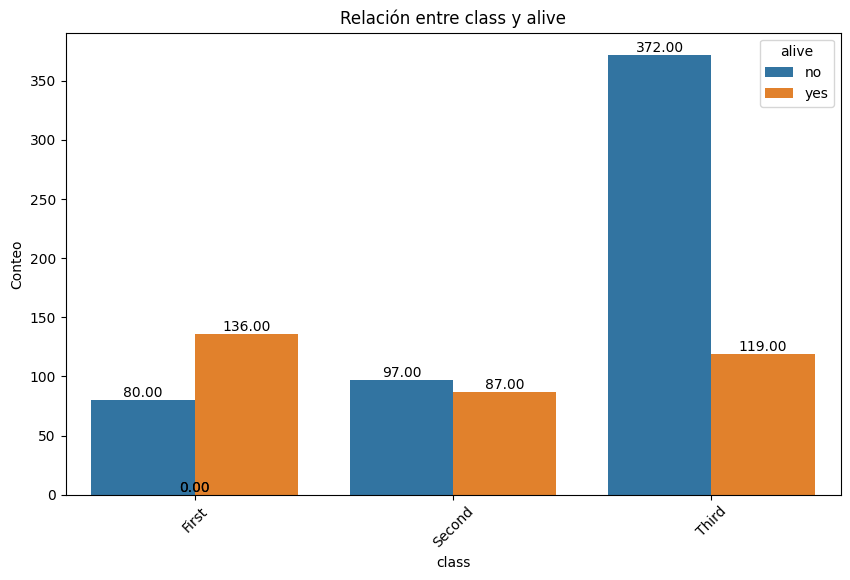

In [101]:
plot_categorical_relationship_fin(df_titanic,"class","alive", relative_freq= False, show_values= True)
#En terminos absolutos sobrevivieron más los de primera clase

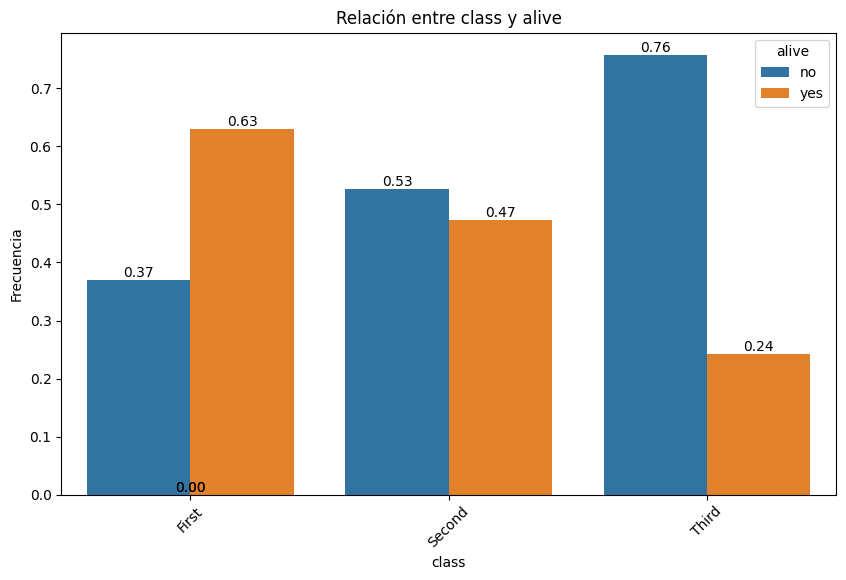

In [103]:
plot_categorical_relationship_fin(df_titanic,"class","alive", relative_freq= True, show_values= True)
#En terminos relativos sobrevivieron más los de primera clase

In [104]:
tabla_contingencia_4 = pd.crosstab(df_titanic['class'], df_titanic['alive'])
tabla_contingencia_4

alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


In [106]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_4)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
#El test chi-2 tiene como hipótesus nula (o de partida) la independencia de las variables
#un P-Value menor de 0.05 nos diría que podemos rechazar la hipótesis de partida con seguridad y 
# podemos concluir que existe una relación estadísticamente significativa entre la clase y sobrevivir.

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


## 3. 
¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

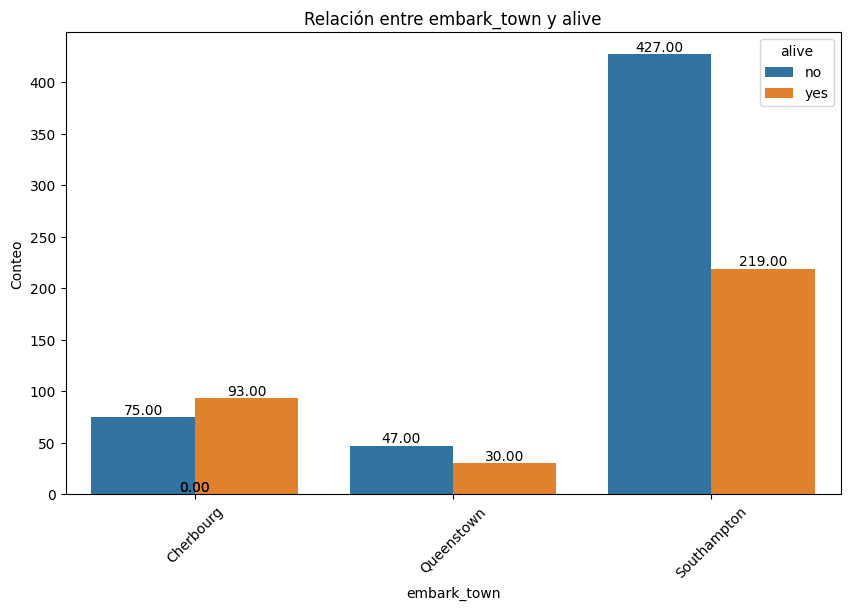

In [108]:
plot_categorical_relationship_fin(df_titanic,"embark_town","alive", relative_freq= False, show_values= True)
#En terminos absolutos sobrevivieron más los Southampton

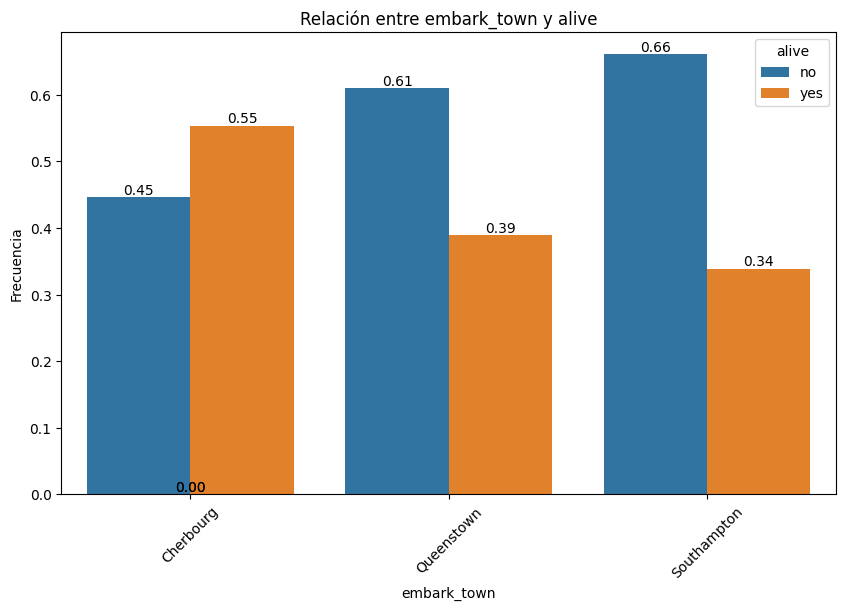

In [110]:
plot_categorical_relationship_fin(df_titanic,"embark_town","alive", relative_freq= True, show_values= True)
#En terminos relativos sobrevivieron más los Cherbourg

In [111]:
tabla_contingencia_5 = pd.crosstab(df_titanic['embark_town'], df_titanic['alive'])
tabla_contingencia_5

alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


In [113]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_5)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
#El test chi-2 tiene como hipótesus nula (o de partida) la independencia de las variables
#un P-Value menor de 0.05 nos diría que podemos rechazar la hipótesis de partida con seguridad y 
# podemos concluir que existe una relación estadísticamente significativa entre la ciudad y sobrevivir.

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


# 4. 
¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

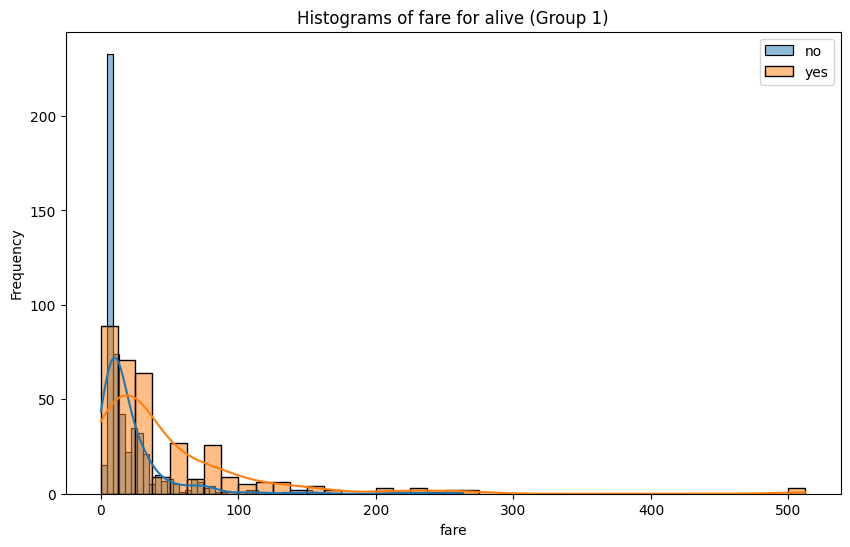

In [115]:
plot_grouped_histograms(df_titanic, cat_col="alive",num_col="fare", group_size= 2)
#Aplico histograma para visualizar si su distribución se parece a una normal
# Si se pareciera a una normal podría utilizar el test t-student 

In [116]:
#Como se puede observar que no se distribuye como normal, aplico prueba U de Mann-Whitney
# Primero separo los datos en dos, según la variable categórica

grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]

In [118]:
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250238e-22


En este caso la hipótesis nula (o directora) es que no hay diferencia estadística significativa entre las medianas de los valores, como obtuvimos un p-value por debajo de 0.05, rechazamos la hipótesis nula y decimos que hay confianza estadística en que las medianas de cada grupo son diferentes para cada valor categórico y que hay una relación entre los valores de la categórica y los de la numérica. 

En resumen: 
* Según este test,  podemos asegurar que el valor del ticket y sobrevivir tienen relación.  

# 5. 
Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [119]:
df_titanic.fare.value_counts()

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [128]:
max_fare = df_titanic['fare'].max()
fila_max_fare = df_titanic.loc[df_titanic['fare'] == max_fare]
print(fila_max_fare) #Las tres personas que más pagaron sobrevivieron
fila_0_fare = df_titanic.loc[df_titanic['fare'] == 0]
print(fila_0_fare) # Hay pasajeron incluso de distintas clases que no pagarom, tal vez se ganaron el ticket


        sex   age      fare  class    who  adult_male embark_town alive  \
258  female  35.0  512.3292  First  woman       False   Cherbourg   yes   
679    male  36.0  512.3292  First    man        True   Cherbourg   yes   
737    male  35.0  512.3292  First    man        True   Cherbourg   yes   

     alone  family_members moda_embark_town  
258   True               0              NaN  
679  False               1              NaN  
737   True               0              NaN  
      sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  33.173123   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  33.173123   0.0  S

# 6. 
Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

In [133]:
col_directora = "alive"
col_1 = "fare"
col_2 = "embark_town"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta no:


ValueError: could not convert string to float: 'Southampton'

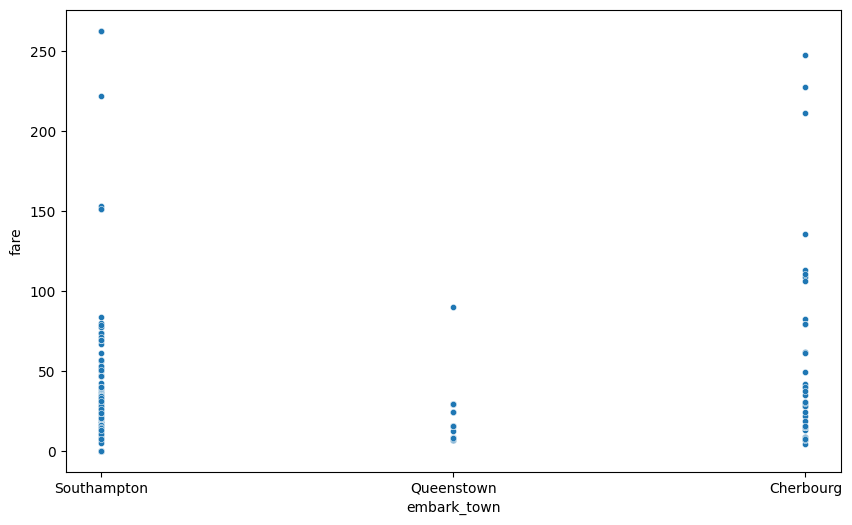

In [134]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

# 7. 
Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [135]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

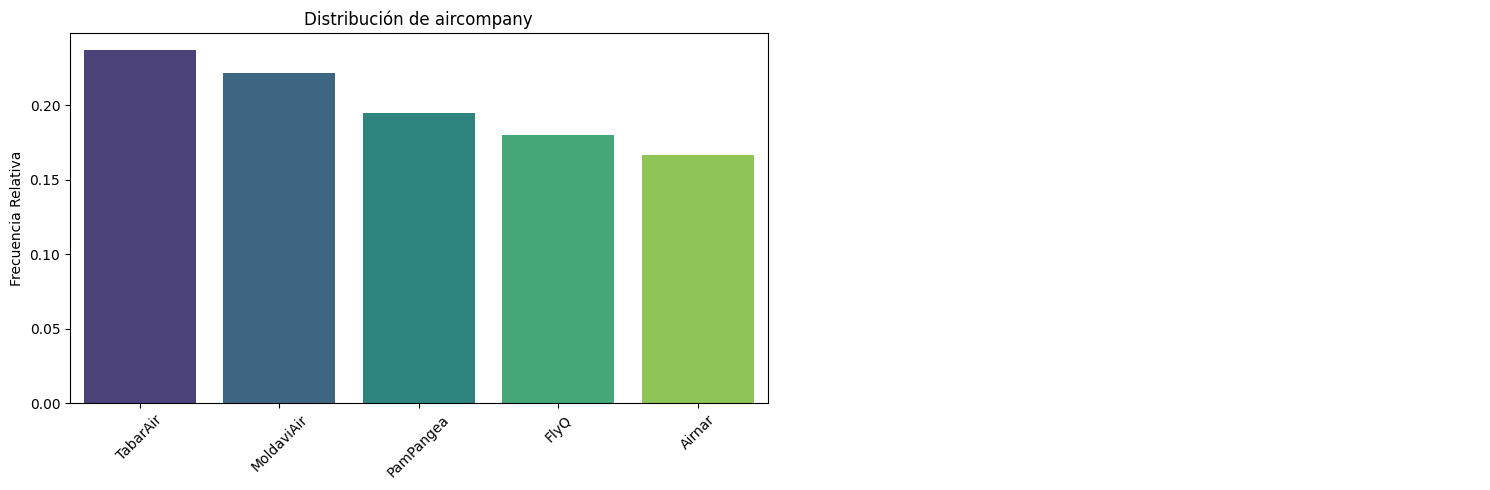

In [136]:
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True)

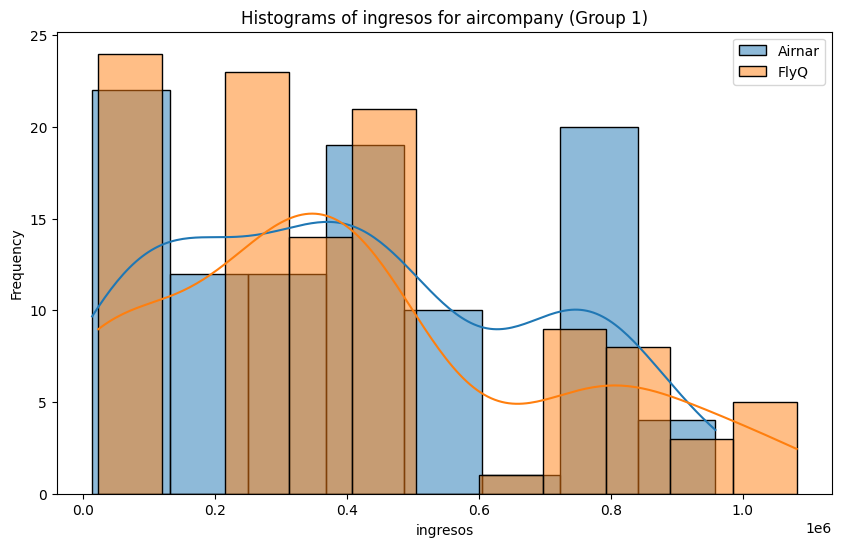

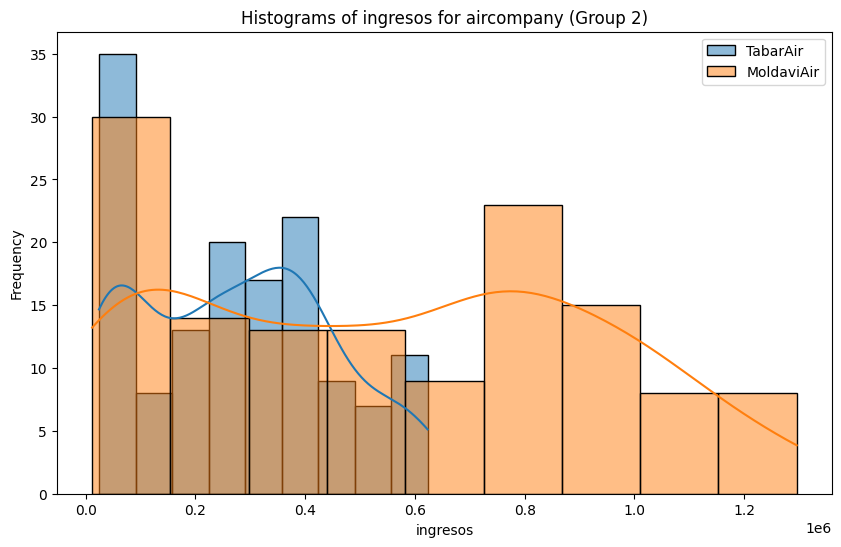

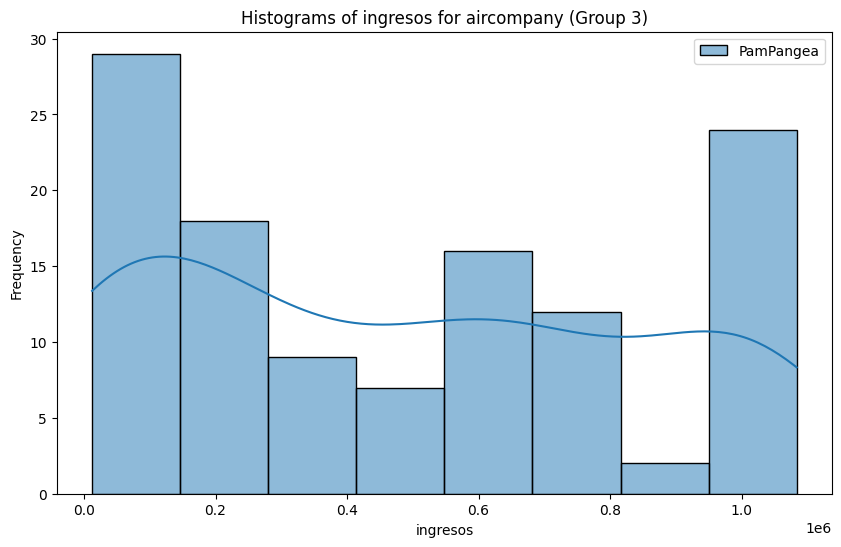

In [137]:
plot_grouped_histograms(df_air_jun, "aircompany","ingresos",group_size= 2)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

In [140]:
col_directora = "aircompany"
col_1 = "ingresos"
col_2 = "consumo_kg"
col_3 = "distancia"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1, col_3]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta Airnar:


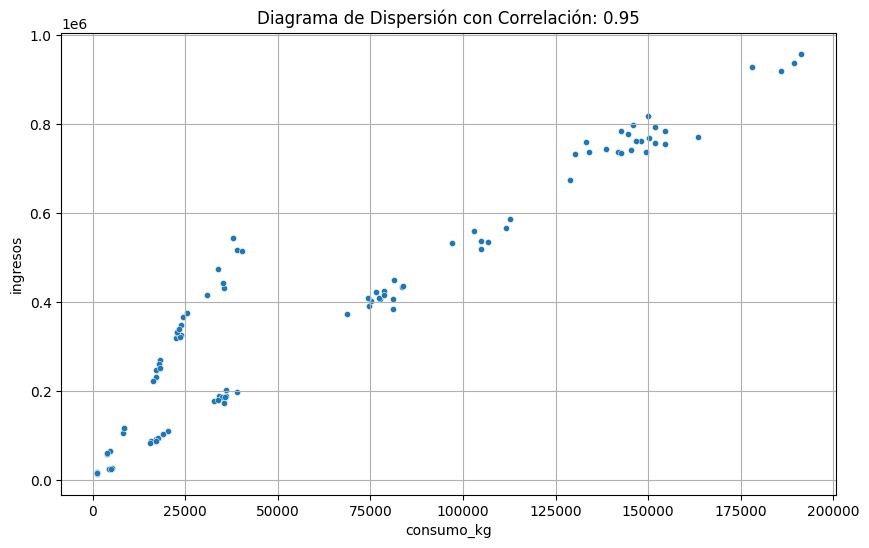

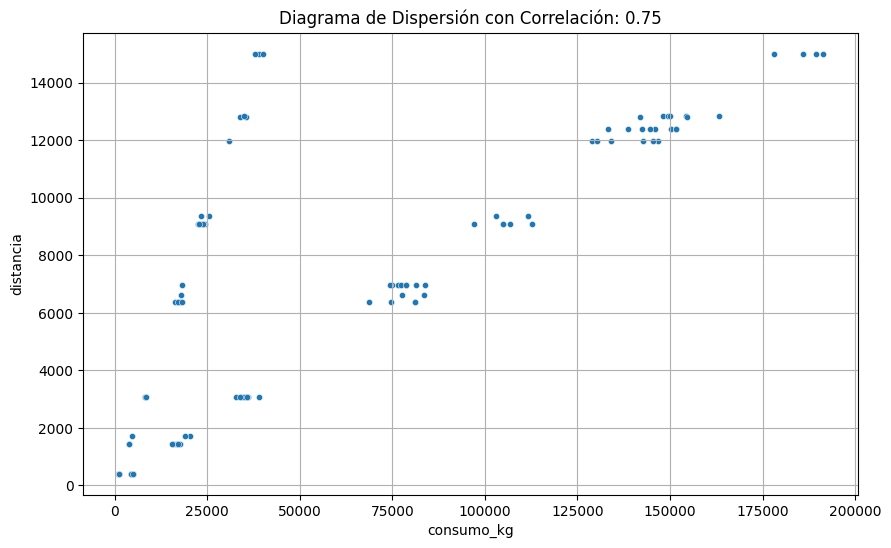

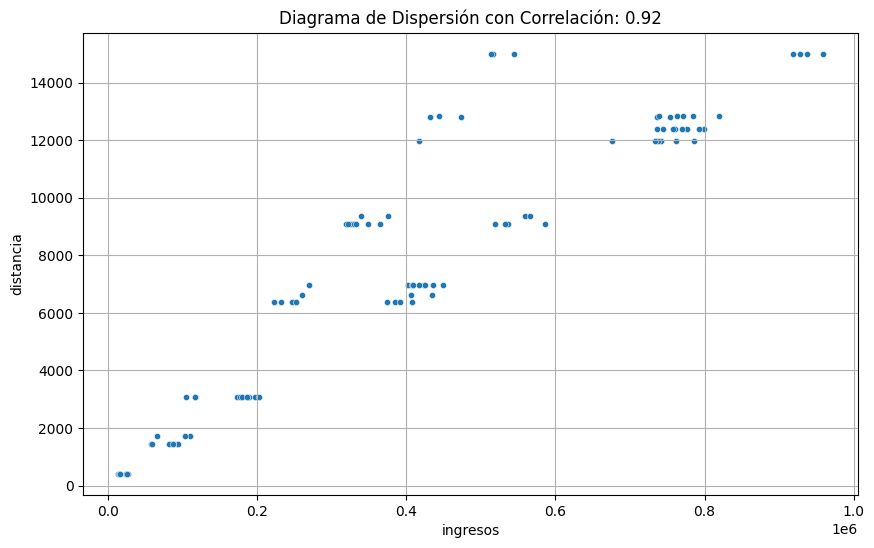

Respuesta FlyQ:


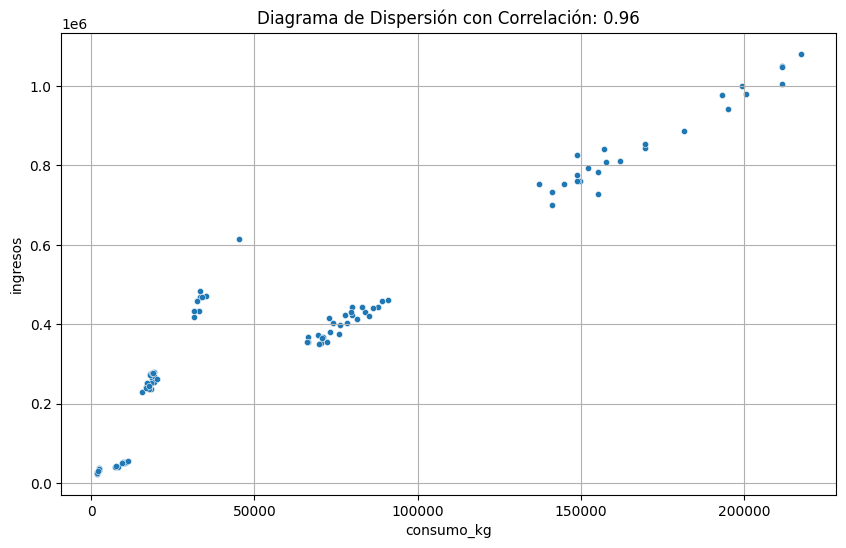

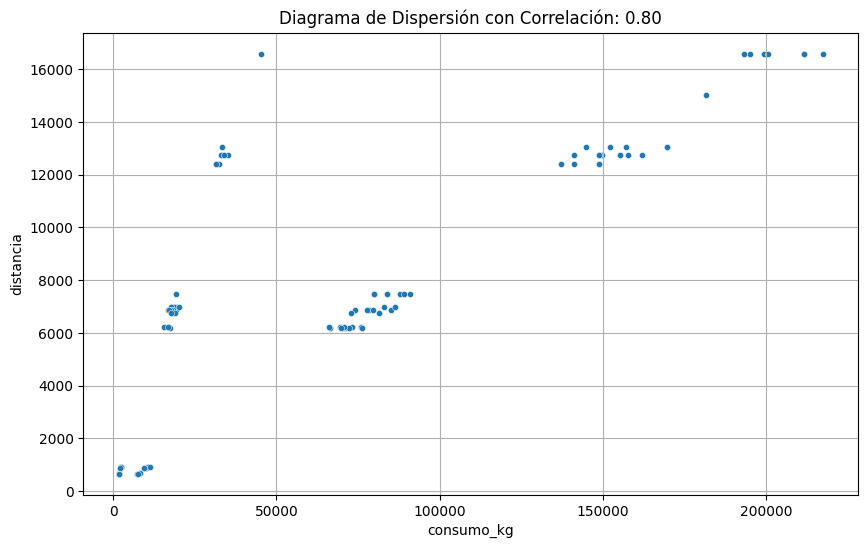

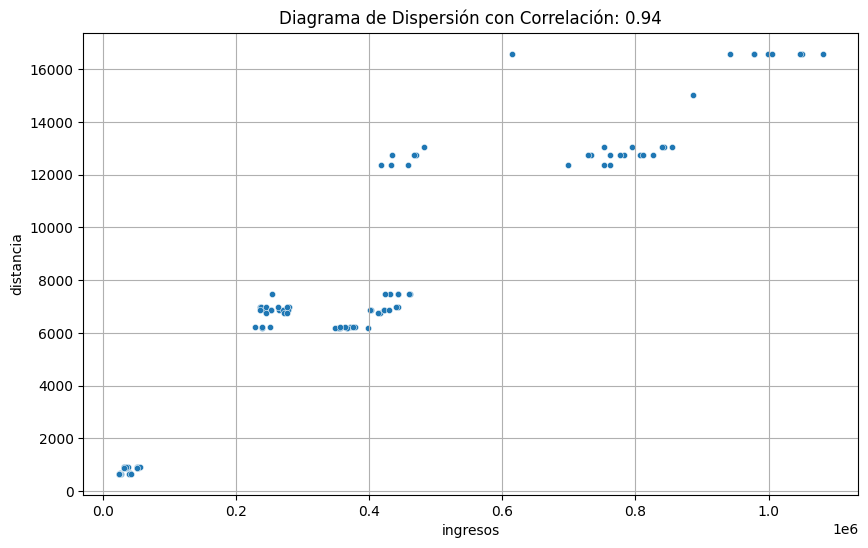

Respuesta TabarAir:


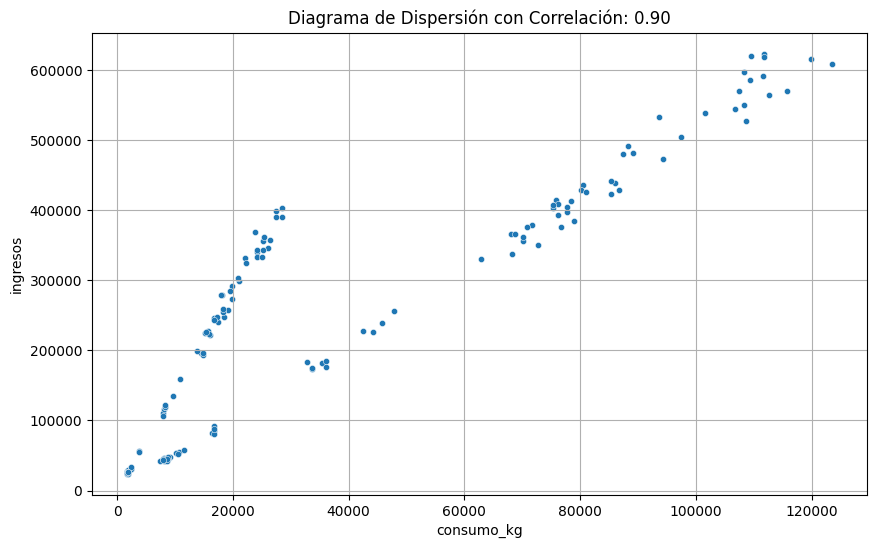

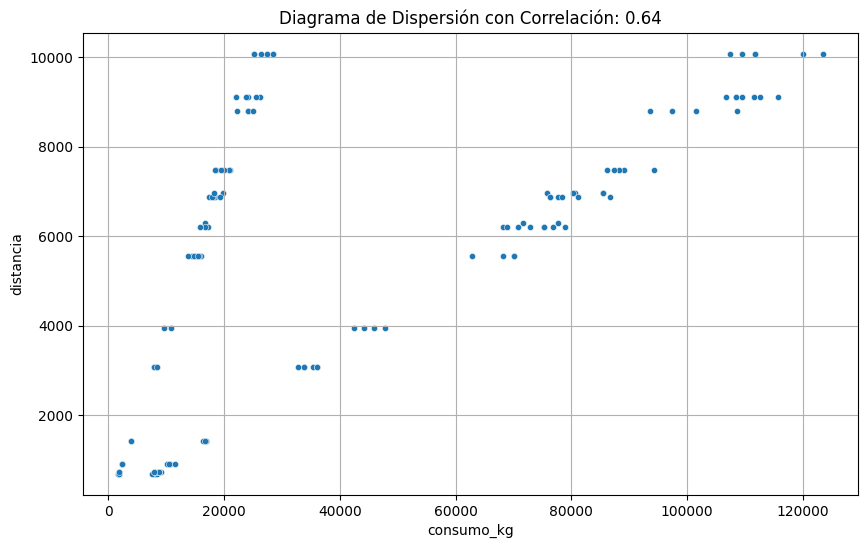

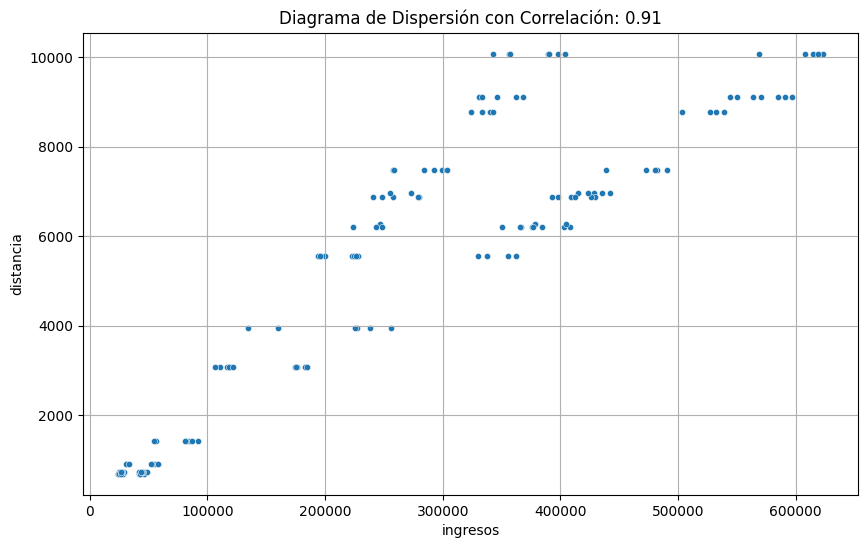

Respuesta MoldaviAir:


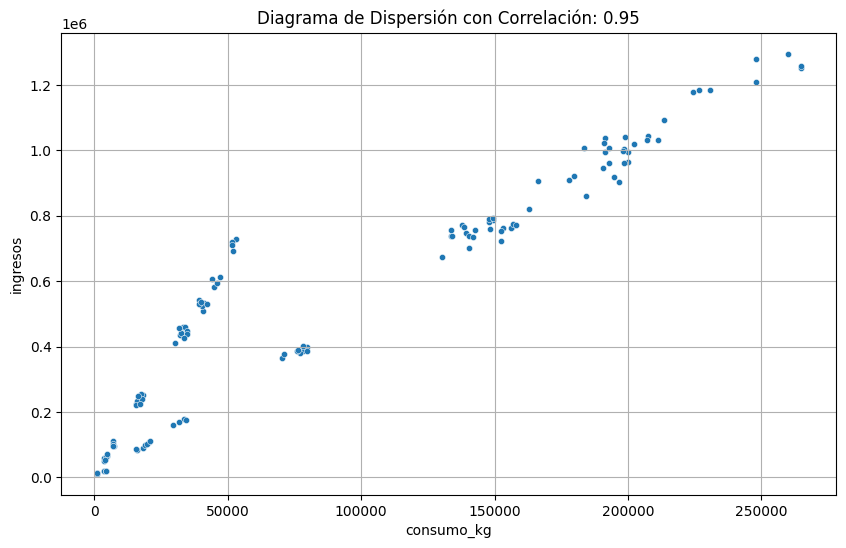

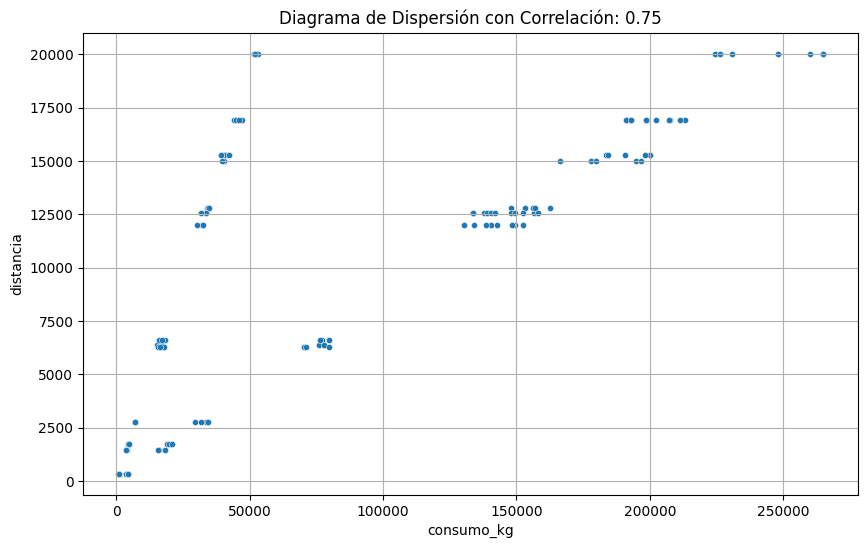

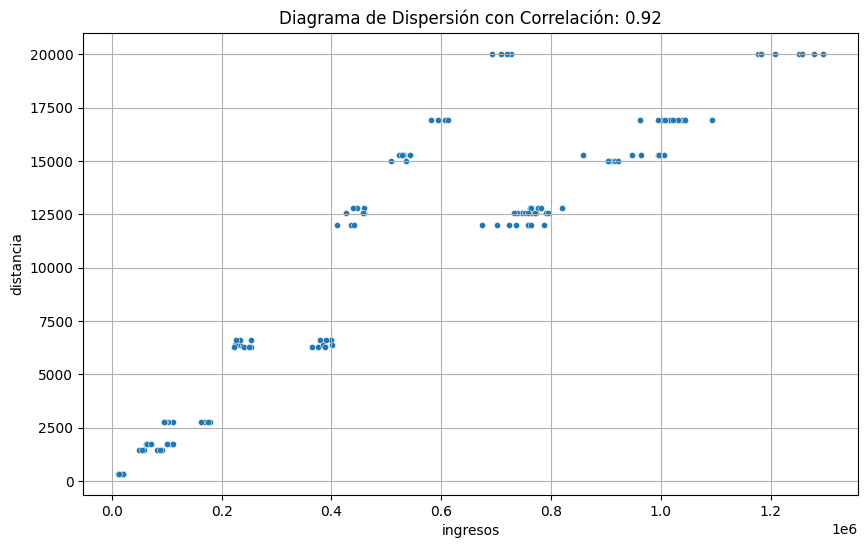

Respuesta PamPangea:


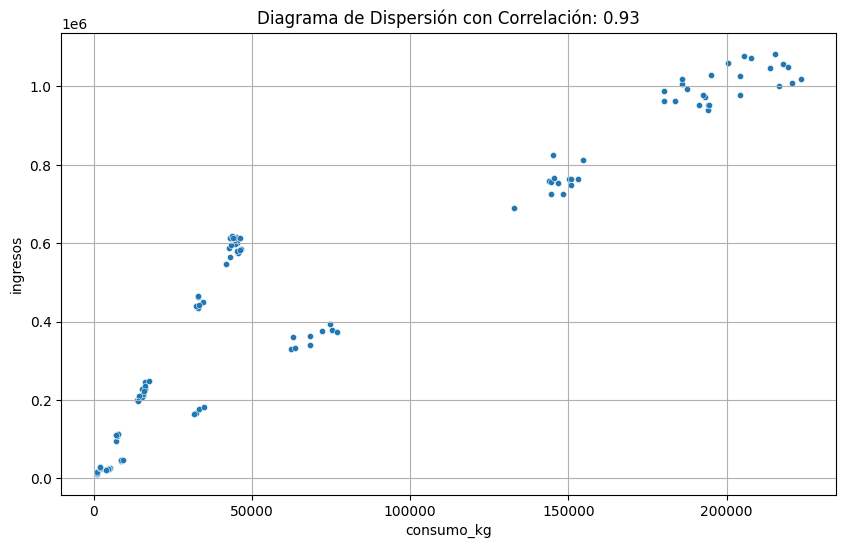

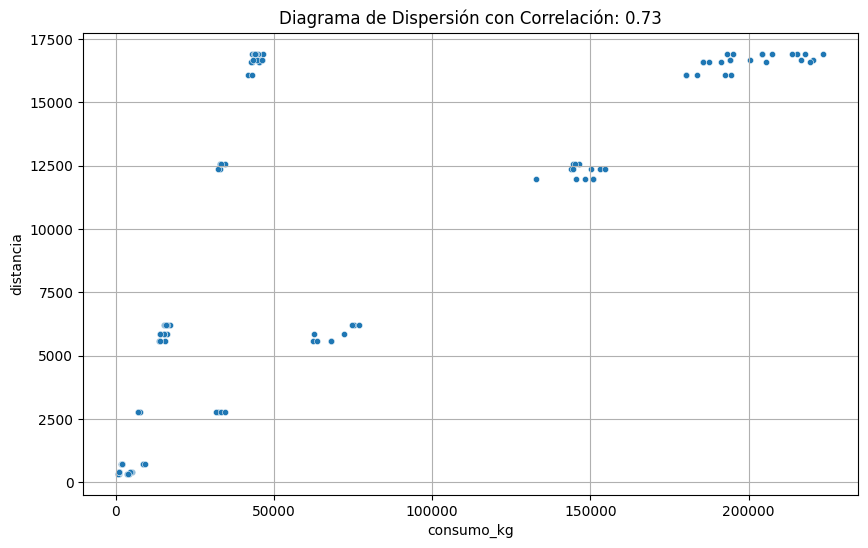

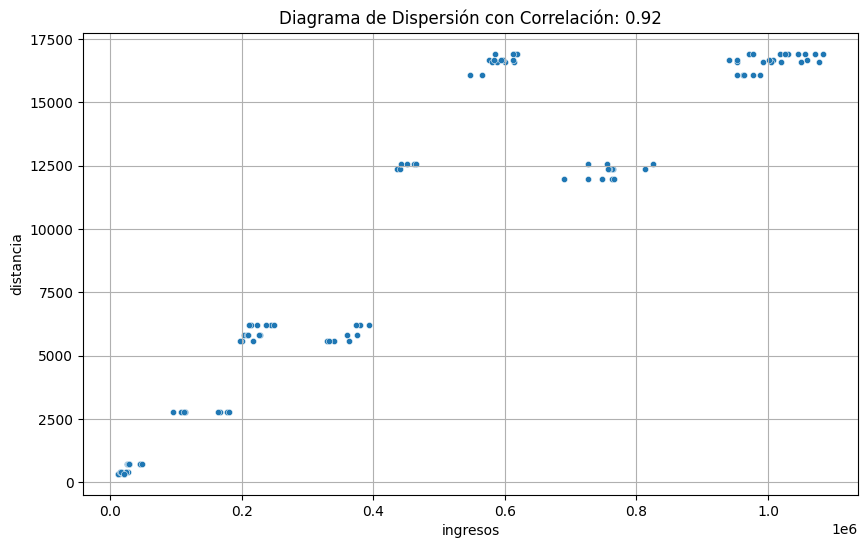

In [143]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)
    grafico_dispersion_con_correlacion(df_datos,col_2,col_3, tamano_puntos=20, mostrar_correlacion= True)
    grafico_dispersion_con_correlacion(df_datos,col_1,col_3, tamano_puntos=20, mostrar_correlacion= True)

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.